# IPL 2022 Auction Analysis

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [ ]:
df = pd.read_csv('ipl_2022_dataset.csv')

In [ ]:
df.shape

(633, 8)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

**How our Data Looks ...**

In [ ]:
df.sample()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
541,541,Chinntla Readdi,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [ ]:
df.drop('Unnamed: 0', axis =1, inplace = True)

**Information of Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.7+ KB


In [ ]:
df.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

**Treating Null Values in 'COST IN ₹ (CR.)' and 'Cost IN $ (000)'**

In [ ]:
df[df['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


*These are the Players which went Unsold in 2022 Auctions so their Cost we can replace with ZERO*

In [ ]:
df['COST IN ₹ (CR.)'] = df['COST IN ₹ (CR.)'].fillna(0)
df['Cost IN $ (000)'] = df['Cost IN $ (000)'].fillna(0)

**Treating Null Values in 2021 Squad**

In [ ]:
df[df['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


**These are the Players who either went Unsold in 2021 IPL or participating for the first time in IPL**

In [ ]:
df['2021 Squad'] = df['2021 Squad'].fillna('Not Participated in IPL 2021')

In [ ]:
df.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

**We replaced all the null values**

**Now we will add and Adjust few columns for further Analysis**

In [ ]:
teams = df[df['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [ ]:
df['status'] = df['Team'].replace(teams,'sold')

In [ ]:
df['Base Price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [ ]:
df['retention'] = df['Base Price']

In [ ]:
df['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh','1.5 Cr'],'In Auction', inplace = True)

*Treating Base Price Column*

In [ ]:
df['Base Price'].replace('Draft Pick',0, inplace = True)

In [ ]:
df['base_price_unit'] = df['Base Price'].apply(lambda x: str(x).split(' ')[-1])
df['base_price'] = df['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [ ]:
df['base_price'].replace('Retained',0,inplace=True)

In [ ]:
df['base_price_unit'].unique()

array(['0', 'Cr', 'Lakh', 'Retained'], dtype=object)

In [ ]:
df['base_price_unit'] = df['base_price_unit'].replace({'Cr':100,'Lakh':1,'Retained':0})

In [ ]:
df['base_price'] = df['base_price'].astype(float)
df['base_price_unit'] = df['base_price_unit'].astype(int)

In [ ]:
df['base_price'] = df['base_price']*df['base_price_unit']

In [ ]:
df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0.0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0.0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,100,200.0
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,1,40.0
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0.0


In [ ]:
df.drop(['Base Price','base_price_unit'], axis =1, inplace = True)

In [ ]:
df

,Player,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price
0,Rashid Khan,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0.0
1,Hardik Pandya,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0.0
2,Lockie Ferguson,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,40.0
4,Shubman Gill,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0.0
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,BATTER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
629,Monu Singh,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
630,Nivethan Radhakrishnan,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
631,Lance Morris,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0


In [ ]:
df['COST IN ₹ (CR.)'] = df['COST IN ₹ (CR.)']*100

In [ ]:
df = df.rename(columns={'TYPE':'Type','COST IN ₹ (CR.)':'Sold_for_lakh','Cost IN $ (000)':'Cost_in_dollars','2021 Squad':'Prev_team','Team':'Curr_team'})

In [ ]:
df.head()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
0,Rashid Khan,BOWLER,1500.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0.0
1,Hardik Pandya,ALL-ROUNDER,1500.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0.0
2,Lockie Ferguson,BOWLER,1000.0,1300.0,KKR,Gujarat Titans,sold,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,900.0,1170.0,RR,Gujarat Titans,sold,In Auction,40.0
4,Shubman Gill,BATTER,800.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0.0


**We will Check Duplicate Players**

In [ ]:
df[df['Player'].duplicated(keep=False)]

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
62,Lalit Yadav,ALL-ROUNDER,65.0,84.5,DC,Delhi Capitals,sold,In Auction,20.0
240,Amit Mishra,BOWLER,0.0,0.0,DC,Unsold,Unsold,In Auction,150.0
499,Amit Mishra,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
518,Shivam Sharma,ALL-ROUNDER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
530,Lalit Yadav,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
537,Shubham Singh,ALL-ROUNDER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
544,Shubham Singh,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
569,Shivam Sharma,ALL-ROUNDER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0


> *Yes There are duplicate rows but the fact is that the names of players are same but the Players are different*

### Our Data is Ready for Analysis

#### Now I have a list of Questions asked by friend and I will be tring to answer those questions below.

****

**1. How many players participated in the Auction 2022 ?**

In [ ]:
df.shape[0]

633

> *There wre 633 Players appeared for TATA IPL 2022*

**2. Participation based on the Role(Batsman, Bowlers, Allrounders and WK)**

In [ ]:
types = df['Type'].value_counts()
types.reset_index()

,index,Type
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

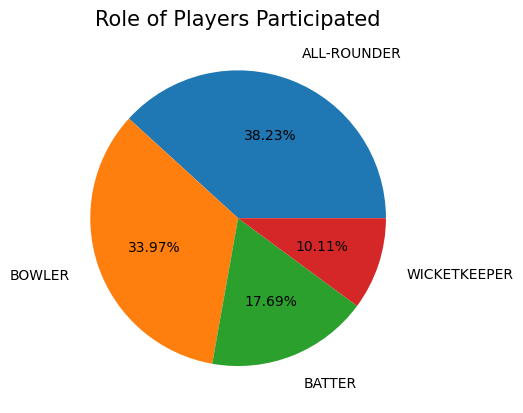

In [ ]:
plt.pie(types.values, labels=types.index,labeldistance=1.2,autopct='%1.2f%%')
plt.title('Role of Players Participated', fontsize = 15)
plt.plot()

> *Maximum Players in Auction were All-Rounders Followed by Bowlers,Batter and WicketKeepers*

**3. How many Players Were Sold in IPL 2022 Auctions ?**

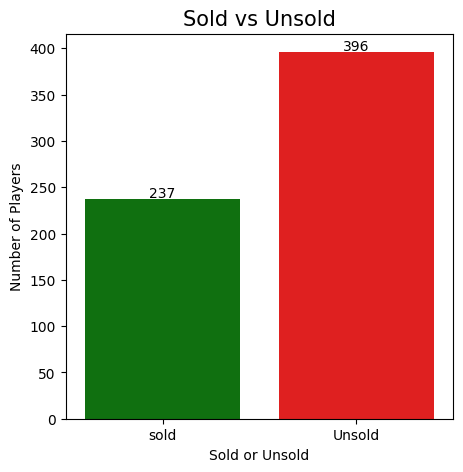

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
fig = sns.countplot(data=df, x='status', palette=['Green', 'Red'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of Players')
plt.title('Sold vs Unsold', fontsize=15)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.show()


> *In Auction 237 were Sold and 396 were Unsold.*

**4. How many Players Brought by Each Team**

In [ ]:
df.sample()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
329,Brandon King,BATTER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,50.0


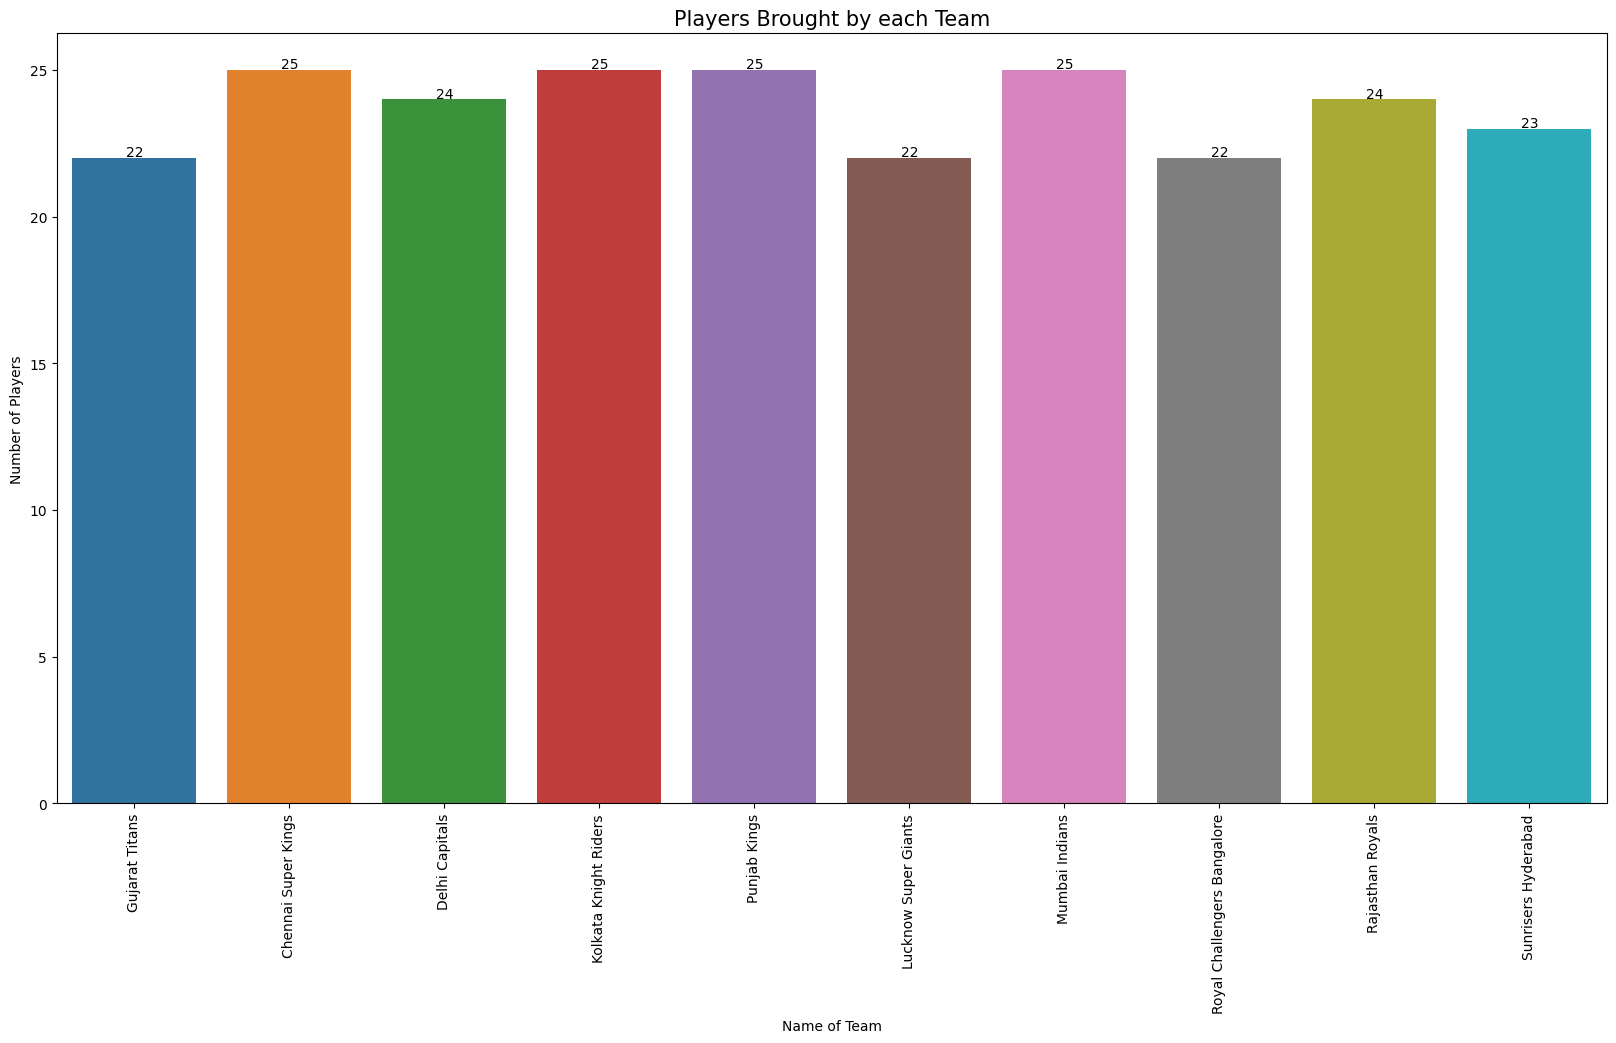

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
fig = sns.countplot(data=df[df['Curr_team'] != 'Unsold'], x='Curr_team')
plt.xlabel('Name of Team')
plt.ylabel('Number of Players')
plt.title('Players Brought by each Team', fontsize=15)
plt.xticks(rotation=90)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.show()


**5. How many players Retained/DraftPicked by Each team ?**

In [ ]:
df.groupby(['Curr_team','retention'])['retention'].count()[:-1]

Curr_team                    retention 
Chennai Super Kings          In Auction    21
                             Retained       4
Delhi Capitals               In Auction    20
                             Retained       4
Gujarat Titans               Draft Pick     3
                             In Auction    19
Kolkata Knight Riders        In Auction    21
                             Retained       4
Lucknow Super Giants         Draft Pick     3
                             In Auction    19
Mumbai Indians               In Auction    21
                             Retained       4
Punjab Kings                 In Auction    23
                             Retained       2
Rajasthan Royals             In Auction    21
                             Retained       3
Royal Challengers Bangalore  In Auction    19
                             Retained       3
Sunrisers Hyderabad          In Auction    20
                             Retained       3
Name: retention, dtype: int64

**5. How many Players were Braught for each Role**

In [ ]:
df.groupby(['Type','status'])['Player'].count().reset_index()

,Type,status,Player
0,ALL-ROUNDER,Unsold,154
1,ALL-ROUNDER,sold,88
2,BATTER,Unsold,67
3,BATTER,sold,45
4,BOWLER,Unsold,138
5,BOWLER,sold,77
6,WICKETKEEPER,Unsold,37
7,WICKETKEEPER,sold,27


**6. Which Are the players who participated in IPL 2021 and will be participating in IPL 2022 and playing in same team**

In [ ]:
df.replace({'SRH':'Sunrisers Hyderabad','CSK':'Chennai Super Kings','MI':'Mumbai Indians','KKR':'Kolkata Knight Riders','RR':'Rajasthan Royals','PBKS':'Punjab Kings','DC':'Delhi Capitals','RCB':'Royal Challengers Bangalore'},inplace =True)

In [ ]:
same_team = df[(df['Curr_team']==df['Prev_team']) & (df['retention']=='In Auction')]
same_team

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
23,Deepak Chahar,BOWLER,1400.0,1820.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
26,Ambati Rayudu,WICKETKEEPER,675.0,877.5,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
28,Dwayne Bravo,ALL-ROUNDER,440.0,572.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
31,Robin Uthappa,BATTER,200.0,260.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
32,Mitchell Santner,ALL-ROUNDER,190.0,247.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,100.0
39,K.Bhagath Varma,ALL-ROUNDER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
41,N. Jagadeesan,WICKETKEEPER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
42,C.Hari Nishaanth,BATTER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
43,K.M. Asif,BOWLER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
62,Lalit Yadav,ALL-ROUNDER,65.0,84.5,Delhi Capitals,Delhi Capitals,sold,In Auction,20.0


In [ ]:
same_team[same_team.Curr_team=='Royal Challengers Bangalore']

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
170,Wanindu Hasaranga,ALL-ROUNDER,1075.0,1397.5,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,100.0
171,Harshal Patel,ALL-ROUNDER,1075.0,1397.5,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,200.0
177,Shahbaz Ahamad,ALL-ROUNDER,240.0,312.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,30.0
181,Finn Allen,BATTER,80.0,104.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,50.0
185,Suyash Prabhudessai,ALL-ROUNDER,30.0,39.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,20.0
187,Akash Deep,BOWLER,20.0,26.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,20.0


**Let's Visualize this team wise**

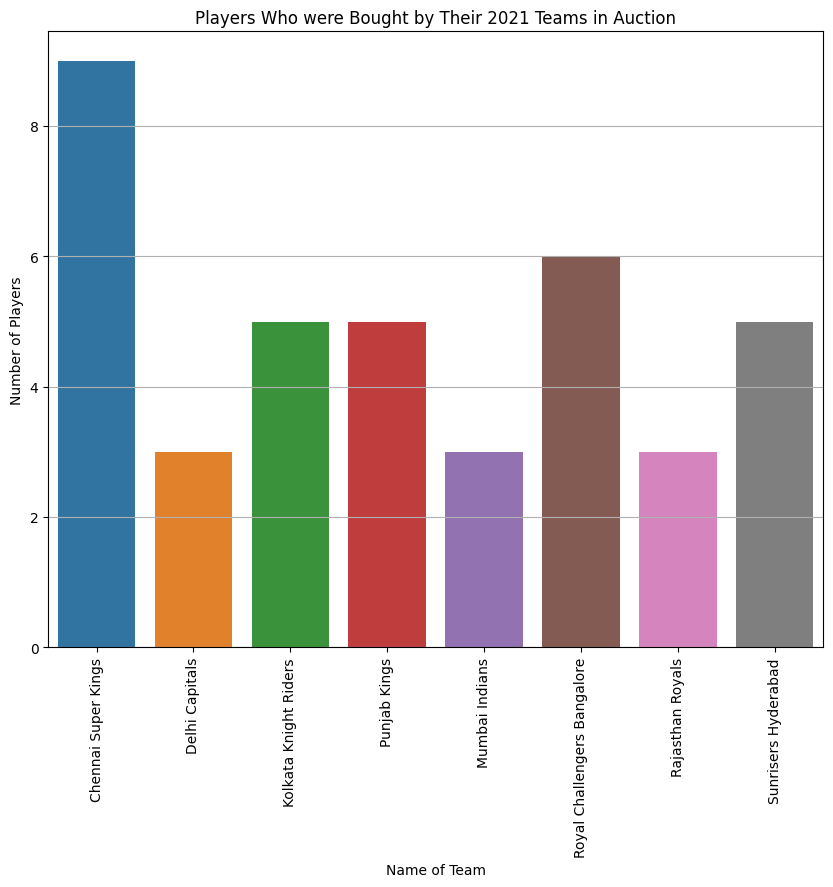

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.countplot(data=same_team, x='Curr_team')
plt.title('Players Who were Bought by Their 2021 Teams in Auction')
plt.xlabel('Name of Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


**7. Number of players in each team based on thier roles**

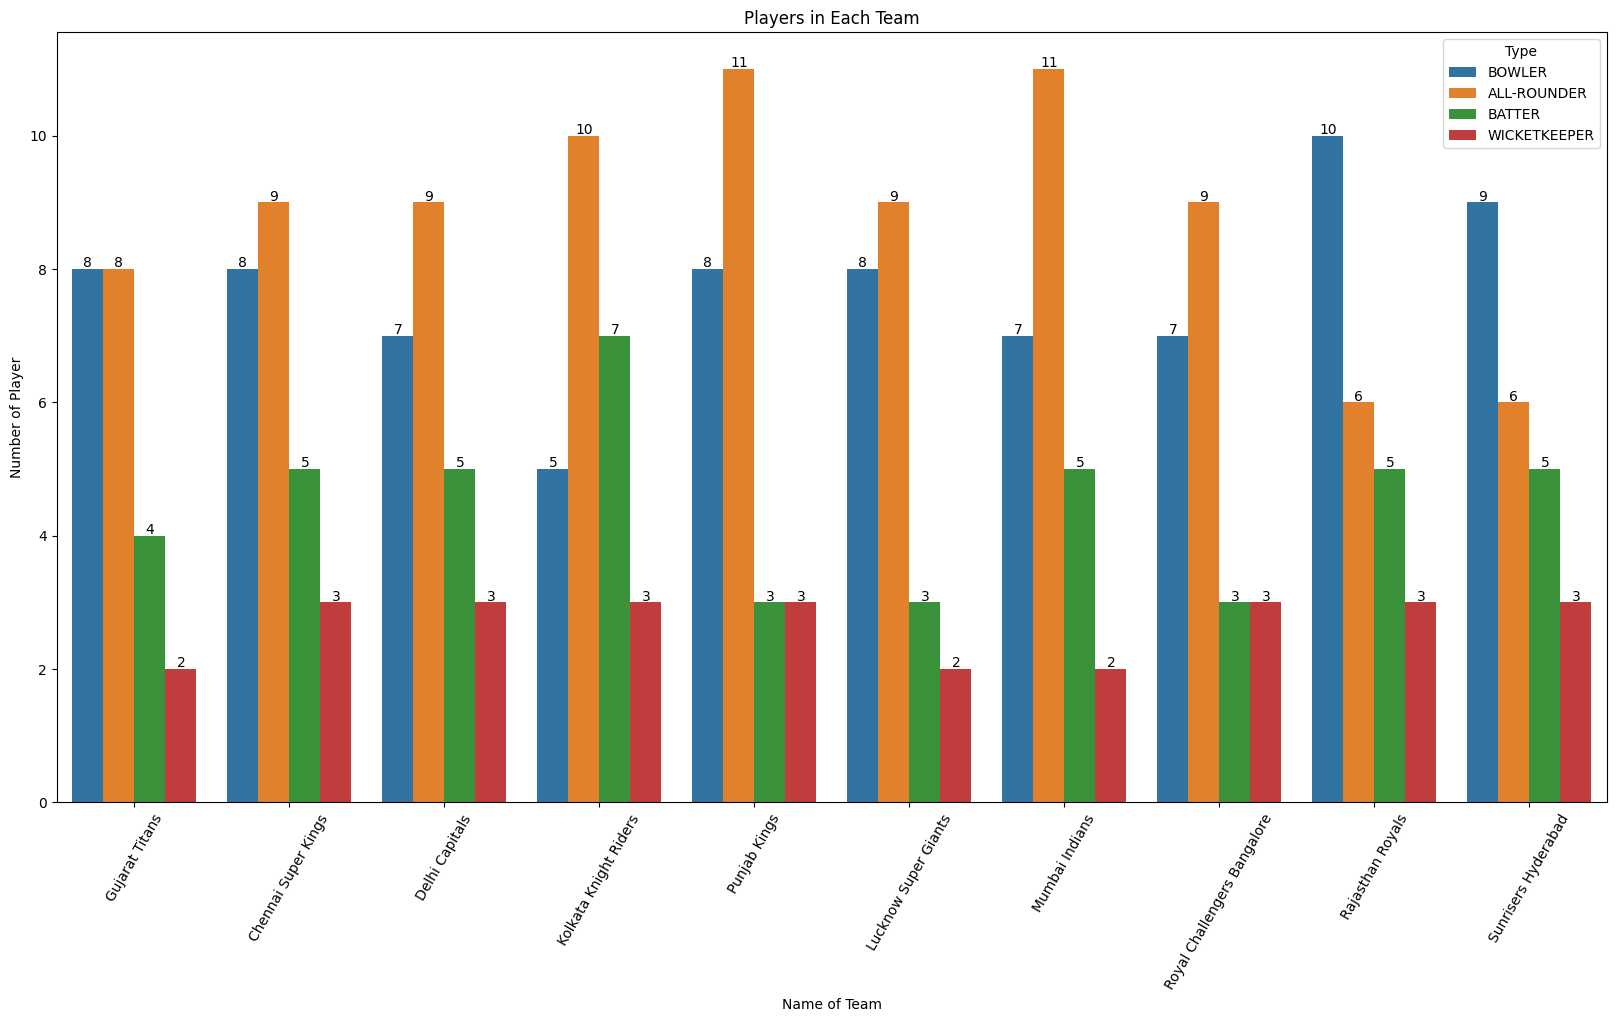

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
fig = sns.countplot(data=df[df['Curr_team'] != 'Unsold'], x='Curr_team', hue='Type')
plt.title('Players in Each Team')
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')
plt.xticks(rotation=60)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.show()


 > **Observation:**

*- This year Sunrisers Hydrabad and Rajasthan Royals are BOWLER Dominated Teams*

**8. Heighest Bid(successful ) by each team**

In [ ]:
df[df['retention']=='In Auction'].groupby(['Curr_team'])['Sold_for_lakh'].max()[:-1].sort_values(ascending = False)

Curr_team
Mumbai Indians                 1525.0
Chennai Super Kings            1400.0
Kolkata Knight Riders          1225.0
Punjab Kings                   1150.0
Delhi Capitals                 1075.0
Royal Challengers Bangalore    1075.0
Sunrisers Hyderabad            1075.0
Gujarat Titans                 1000.0
Lucknow Super Giants           1000.0
Rajasthan Royals               1000.0
Name: Sold_for_lakh, dtype: float64

**9. Top Five Batsman picked from Auction**

In [ ]:
df[(df['retention']=='In Auction') & (df['Type']=='BATTER')].sort_values(by='Sold_for_lakh', ascending = False).head(5)

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
71,Shreyas Iyer,BATTER,1225.0,1592.5,Delhi Capitals,Kolkata Knight Riders,sold,In Auction,200.0
193,Shimron Hetmyer,BATTER,850.0,1105.0,Delhi Capitals,Rajasthan Royals,sold,In Auction,150.0
217,Rahul Tripathi,BATTER,850.0,1105.0,Kolkata Knight Riders,Sunrisers Hyderabad,sold,In Auction,40.0
100,Shikhar Dhawan,BATTER,825.0,1072.5,Delhi Capitals,Punjab Kings,sold,In Auction,200.0
195,Devdutt Padikkal,BATTER,775.0,1007.5,Royal Challengers Bangalore,Rajasthan Royals,sold,In Auction,200.0


**10. Heighest Paid Retained player**

In [ ]:
df[df['retention']=='Retained'].sort_values(by = 'Sold_for_lakh', ascending = False).head(1)

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
22,Ravindra Jadeja,ALL-ROUNDER,1600.0,2080.0,Chennai Super Kings,Chennai Super Kings,sold,Retained,0.0


> Sir Jadeja It is

**11. Amount Spent by each team in Auction**

In [ ]:
amount_spent = df.groupby('Curr_team')['Sold_for_lakh'].sum()[:-1]
amount_spent

Curr_team
Chennai Super Kings            8705.0
Delhi Capitals                 8640.0
Gujarat Titans                 8965.0
Kolkata Knight Riders          8155.0
Lucknow Super Giants           8940.0
Mumbai Indians                 8990.0
Punjab Kings                   8455.0
Rajasthan Royals               8905.0
Royal Challengers Bangalore    8845.0
Sunrisers Hyderabad            8990.0
Name: Sold_for_lakh, dtype: float64

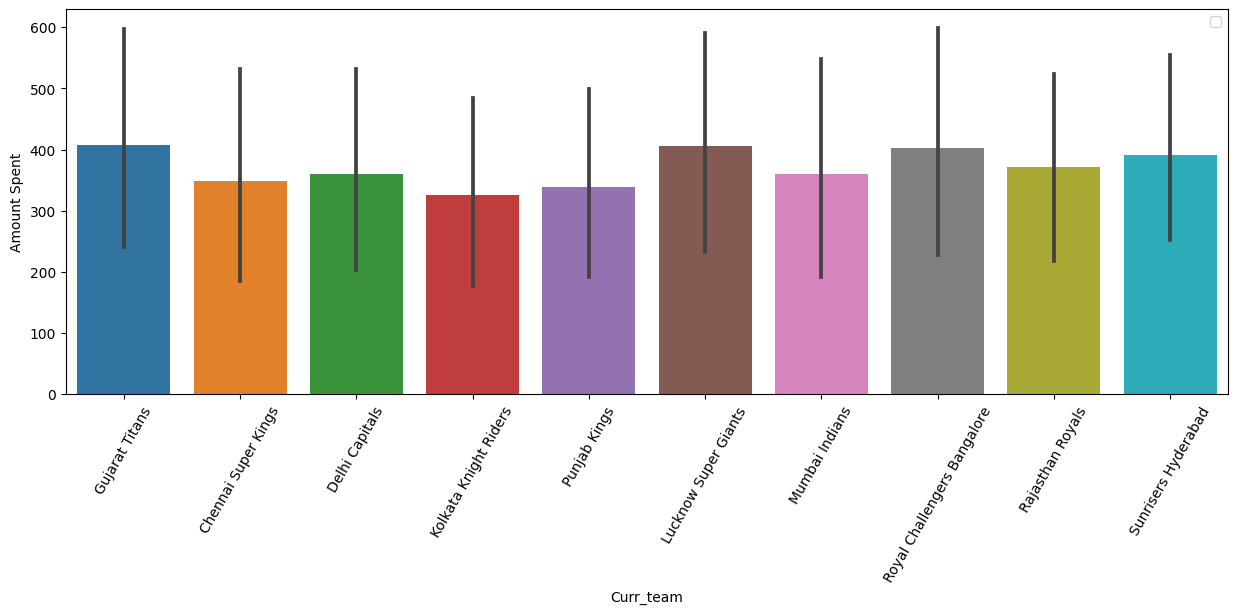

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.barplot(x='Curr_team', y='Sold_for_lakh', data=df[df['Curr_team'] != 'Unsold'])
plt.xticks(rotation=60)
plt.ylabel('Amount Spent')
plt.legend()
plt.show()


**12. List of players who Played IPL 2021 but went unsold this time**

In [ ]:
unsold_stars = df[(df.Prev_team != 'Not Participated in IPL 2021') & (df.Curr_team == 'Unsold')][['Player','Prev_team']]

In [ ]:
unsold_stars

,Player,Prev_team
237,Suresh Raina,Chennai Super Kings
238,Steve Smith,Delhi Capitals
239,Shakib Al Hasan,Kolkata Knight Riders
240,Amit Mishra,Delhi Capitals
241,Adil Rashid,Punjab Kings
242,Imran Tahir,Chennai Super Kings
243,Mujeeb Zadran,Sunrisers Hyderabad
244,Adam Zampa,Royal Challengers Bangalore
245,Rajat Patidar,Royal Challengers Bangalore
246,Mohammed Azharuddeen,Royal Challengers Bangalore


In [ ]:
unsold_stars.groupby('Prev_team')['Player'].count()

Prev_team
Chennai Super Kings            3
Delhi Capitals                 7
Kolkata Knight Riders          5
Mumbai Indians                 6
Punjab Kings                   5
Rajasthan Royals               3
Royal Challengers Bangalore    7
Sunrisers Hyderabad            4
Name: Player, dtype: int64